# Mathematics for Data Science

## Final Exam (Part 1) - Take-Home Problems

#### Deadline: 11:59pm June 13, 2020 (Sunday)

This midterm should be submitted <b><u>individually</u></b>.   

Name:

<b><u>Read the instructions and questions carefully.</u></b>

Do <b><u>NOT</u></b> import any other libraries aside from those below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

plt.rcParams['figure.figsize'] = [5, 5]

np.set_printoptions(precision=4, suppress=True)

---

## I. Stochastic Gradient Descent (2 pts.)

The major drawback of batch gradient descent is that it is usually computationally expensive to calculate a gradient update using the entire dataset. Instead, most optimization algorithms in deep learning use so-called <b>minibatch</b> or <b>minibatch stochastic</b> methods, where gradients are calculated on a random sample of the dataset.

In this section, your goal is to implement <b>stochastic gradient descent</b> (SGD) with momentum. Click [`here`](https://www.deeplearningbook.org/contents/optimization.html) for more details.

Once again, we will fit a simple linear regression model:

\begin{align*}
    y = \theta_0 + \theta_1 x
\end{align*}

to the `diabetes` dataset in `sklearn`.

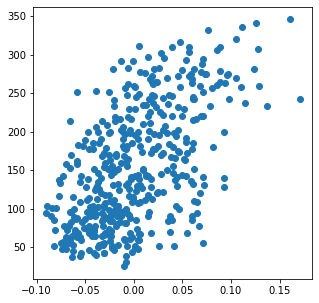

In [2]:
# Load the diabetes dataset
x, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
x = x[:, 2]

# Plot the data
plt.scatter(x, y)
plt.show()

#### Q1. (2 pts.)

Implment SGD with a learning rate $\epsilon_k$ that randomly samples (w/o replacement) a minibatch of size $m$ from the dataset every iteration.

Adjust the learning rate at each iteration $k$ so that it decays linearly until iteration $\tau$:

\begin{align}
    \epsilon_k &= (1-\alpha)\epsilon_0 + \alpha \epsilon_\tau
\end{align}

where $\alpha = \frac{k}{\tau}$. After iteration $\tau$, leave $\epsilon$ constant.

Similar to the previous exam, use SGD to estimate the parameters $\hat{\theta}_0$ and $\hat{\theta}_1$ by minimizing the <b><i>mean squared error</b></i> (MSE):

\begin{align*}
    J(\hat{\theta}_0, \hat{\theta}_1) &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

Print a diagnostic output for the first five iterations $k = 0, 1, 2, 3, 4$, then print the output every 100 iterations $k = 100, 200, 300 , \ldots, 5000$.

The diagnostic output should contain the following: the iteration $k$, learning rate $\epsilon_k$, parameters $\hat{\theta}_{k,0}, \hat{\theta}_{k,1}$, and MSE $J(\hat{\theta}_{k,0}, \hat{\theta}_{k,1})$.

In [3]:
# Use the following variables
np.random.seed(1)
m = 100
tau = 6000
learning_rate_0 = 0.5
learning_rate_tau = 0.01
theta_k = np.array([1, 1])

# Your code here

def sample_minibatch(x, y, m):
    random_idx = np.random.choice(range(x.shape[0]), size=m, replace=False)
    return x[random_idx], y[random_idx]

def J(theta, x, y):
    return np.mean((y - (theta[0] + theta[1]*x))**2)

def SLR(x):
    return 152.1335 + 949.4352*x

for k in range(0, 5001):
    
    ### Adjust learning rate
    if k <= tau:
        alpha = k/tau
        learning_rate = (1-alpha)*learning_rate_0 + alpha*learning_rate_tau
    
    ### Diagnostics
    if k < 5:
        print("k = %d --" %k,"e = %.4f --" %learning_rate,"theta_k[0] = %.4f --" %theta_k[0],"theta_k[1] = %.4f --" %theta_k[1], "J(theta_k) = %.4f" %J(theta_k, x, y))
    elif k % 100 == 0:
        print("k = %d --" %k,"e = %.4f --" %learning_rate,"theta_k[0] = %.4f --" %theta_k[0],"theta_k[1] = %.4f --" %theta_k[1], "J(theta_k) = %.4f" %J(theta_k, x, y))
    #else:
    #    break
    
    ### Sample minibatch
    x_mini, y_mini = sample_minibatch(x, y, m)
    
    ### Gradient update
    theta_k = theta_k - learning_rate*np.array([np.mean(-2*y_mini + 2*theta_k[0] + 2*theta_k[1]*x_mini), np.mean(-2*y_mini*x_mini + 2*theta_k[0]*x_mini + 2*theta_k[1]*x_mini**2)])

k = 0 -- e = 0.5000 -- theta_k[0] = 1.0000 -- theta_k[1] = 1.0000 -- J(theta_k) = 28766.9211
k = 1 -- e = 0.4999 -- theta_k[0] = 147.2669 -- theta_k[1] = 1.5860 -- J(theta_k) = 5946.7607
k = 2 -- e = 0.4998 -- theta_k[0] = 158.1739 -- theta_k[1] = 3.6617 -- J(theta_k) = 5950.6702
k = 3 -- e = 0.4998 -- theta_k[0] = 158.9536 -- theta_k[1] = 5.6730 -- J(theta_k) = 5952.1000
k = 4 -- e = 0.4997 -- theta_k[0] = 152.3173 -- theta_k[1] = 7.9421 -- J(theta_k) = 5895.9413
k = 100 -- e = 0.4918 -- theta_k[0] = 158.0382 -- theta_k[1] = 192.7383 -- J(theta_k) = 5220.7757
k = 200 -- e = 0.4837 -- theta_k[0] = 144.1894 -- theta_k[1] = 340.5908 -- J(theta_k) = 4792.2340
k = 300 -- e = 0.4755 -- theta_k[0] = 150.6435 -- theta_k[1] = 462.8226 -- J(theta_k) = 4428.4050
k = 400 -- e = 0.4673 -- theta_k[0] = 153.2561 -- theta_k[1] = 557.1520 -- J(theta_k) = 4239.8755
k = 500 -- e = 0.4592 -- theta_k[0] = 159.0225 -- theta_k[1] = 634.2359 -- J(theta_k) = 4162.6908
k = 600 -- e = 0.4510 -- theta_k[0] = 153

---

## II. PageRank (10 pts.)

[`PageRank`](https://en.wikipedia.org/wiki/PageRank) is an algorithm used to rank webpages and is an important research topic in Search Engine Optimization (SEO). Originally developed by [`Larry Page`](https://en.wikipedia.org/wiki/Larry_Page) and [`Sergey Brin`](https://en.wikipedia.org/wiki/Sergey_Brin), the founders of Google, some refer to it to as the [`25 Billion Dollar Eigenvector`](https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf). It was the pioneering method used by Google to determine a webpage's relevenace or importance. Very cool.

We begin with a simple model of the [`World Wide Web`](https://en.wikipedia.org/wiki/World_Wide_Web) that consists of six webpages:

<img src = "fig1.png" width = "300"/>

Each arrow corresponds to a hyperlink that a user can click on to bring them to some corresponding destination webpage.

Your goal is to rank these pages and display them to the users of a search engine.

#### Q1. (0.5 pts.)

Given that a user is on a particular page, assume that he clicks on a random link with uniform probability. 

Note that only Page 1 has a self-referential link (i.e. for the other webpages, the user <b><u>must</b></u> move to another page).

Construct a probability transition matrix $A$ based on the graph above.

In [4]:
# Insert code here

A = np.array([[1, 0, 0, 1/2, 0, 0],
              [0, 0, 1, 1/2, 1/3, 1/2],
              [0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1/3, 0],
              [0, 0, 0, 0, 0, 1/2],
              [0, 0, 0, 0, 1/3, 0]])

print(A)

[[1.     0.     0.     0.5    0.     0.    ]
 [0.     0.     1.     0.5    0.3333 0.5   ]
 [0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.3333 0.    ]
 [0.     0.     0.     0.     0.     0.5   ]
 [0.     0.     0.     0.     0.3333 0.    ]]


#### Q2. (1 pts.)

What are the two properties that a matrix must have in order to be considered a valid probablity transition matrix (and by extension, a valid Markov chain)?

#### Answer.

1) $\sum_{i = 1}^{n} a_{ij} = 1$, i.e. the columns must sum to 1.

2) $0 \leq a_{ij} \leq 1$, i.e. every element must be from 0 to 1.

#### Q3. (1 pts.)

Based on the graph alone, you may have noticed that it is possible for a user that is randomly clicking links to eventually become "stuck".

What are the two situations in which a user can become "stuck"?

#### Answer.

1) Once a user reaches Page 1, they are stuck.

2) Once a user reaches Page 2, they are stuck in a cycle between Page 2 and 3.

#### Q4. (0.5 pts.)

Suppose that a user starts at Page 6.

Calculate the probability distribution vector at time step $k = 100$. 

In [5]:
# Insert code here

x_0 = np.array([0, 0, 0, 0, 0, 1])

x_k = np.linalg.matrix_power(A, 100).dot(x_0)

print(x_k)

x_k = A.dot(x_k)

print(x_k)

x_k = A.dot(x_k)

print(x_k)

x_k = A.dot(x_k)

print(x_k)

[0.1 0.2 0.7 0.  0.  0. ]
[0.1 0.7 0.2 0.  0.  0. ]
[0.1 0.2 0.7 0.  0.  0. ]
[0.1 0.7 0.2 0.  0.  0. ]


#### Q5. (1 pts.)

Calculate $\lim_{k \rightarrow \infty} A^k$. 

First when $k$ is even, then when $k$ is odd.

In [6]:
# Insert code here

print(np.linalg.matrix_power(A, 100))
print(np.linalg.matrix_power(A, 101))

[[1.  0.  0.  0.5 0.2 0.1]
 [0.  1.  0.  0.  0.4 0.2]
 [0.  0.  1.  0.5 0.4 0.7]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]
[[1.  0.  0.  0.5 0.2 0.1]
 [0.  0.  1.  0.5 0.4 0.7]
 [0.  1.  0.  0.  0.4 0.2]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]


#### Q6. (1 pts.)

Compute the eigenvalues and eigenvectors of $A$.

In [7]:
# Insert code here

eig, vec = np.linalg.eig(A)

print(eig)
print(vec)

[ 1.      1.     -1.      0.      0.4082 -0.4082]
[[ 1.      0.      0.     -0.4082 -0.3076 -0.173 ]
 [ 0.      0.7071 -0.7071  0.     -0.2512  0.1412]
 [ 0.      0.7071  0.7071 -0.4082 -0.6152 -0.3459]
 [ 0.      0.      0.      0.8165  0.364   0.4871]
 [ 0.      0.      0.      0.      0.4459 -0.5966]
 [ 0.      0.      0.      0.      0.364   0.4871]]


#### Q7. (1 pts.)

Based on the discussion and your answers so far, what can you say about the stationary distribution of $A$?

#### Answer.

(Answer in 1 to 2 sentences ONLY)

There are multiple stationary distributions.

#### Interlude

Obviously, someone browsing the internet doesn't get "stuck". In fact, we don't always click links when surfing the net. Ocassionally, we can type the URL of a website directly into the address bar.

We can model this behavior as a new probability transition matrix,

\begin{align}
    B &= \begin{bmatrix}
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6
         \end{bmatrix}
\end{align}

Basically, the matrix says that at any page we can jump to any other page (including itself) chosen uniformly at random.

We can now combine the behaviors modeled by $A$ and $B$ as a mixture of two Markov chains,

\begin{align}
    C &= (1 - \gamma)A + \gamma B
\end{align}

where the $\gamma$ parameter is called the <b><u>damping factor</b></u>. 

The new Markov chain $C$ says that with probability $1 - \gamma$ a user clicks on a random link and that with probability $\gamma$ a user types directly into the address bar.

#### Q8. (1 pts.)

For this exercise, set $\gamma = 0.1$.

Construct the probability transition matrix of our new Markov chain $C$.

In [8]:
# Insert code here

B = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]])

C = 0.9*A + 0.1*B

print(C)

[[0.9167 0.0167 0.0167 0.4667 0.0167 0.0167]
 [0.0167 0.0167 0.9167 0.4667 0.3167 0.4667]
 [0.0167 0.9167 0.0167 0.0167 0.0167 0.0167]
 [0.0167 0.0167 0.0167 0.0167 0.3167 0.0167]
 [0.0167 0.0167 0.0167 0.0167 0.0167 0.4667]
 [0.0167 0.0167 0.0167 0.0167 0.3167 0.0167]]


#### Q1. (1 pts.)

Compute the eigenvalues and eigenvectors of $C$. No need to rescale.

In [9]:
# Insert code here

eig, vec = np.linalg.eig(C)

print(eig)
print(vec)

[ 1.      0.9    -0.9     0.3674 -0.3674  0.    ]
[[ 0.5218  0.8165  0.      0.3076 -0.173   0.4082]
 [ 0.6153 -0.4082  0.7071  0.2512  0.1412 -0.    ]
 [ 0.5849 -0.4082 -0.7071  0.6152 -0.3459  0.4082]
 [ 0.0468  0.     -0.     -0.364   0.4871 -0.8165]
 [ 0.0522  0.     -0.     -0.4459 -0.5966  0.    ]
 [ 0.0468  0.     -0.     -0.364   0.4871  0.    ]]


#### Q10. (1 pts.)

Without using your answer in Q9, calculate the stationary distribution numerically.

In [10]:
# Insert code here

x_0 = np.array([0, 0, 0, 0, 0, 1])

x_k = np.linalg.matrix_power(C, 100).dot(x_0)

print(x_k)

[0.2794 0.3294 0.3132 0.025  0.0279 0.025 ]


#### Q11. (0.5 pts.)

Based on the stationary distribution you've calculated in Q10, rank the webpages.

#### Answer.

Search Results:

Page 2

Page 3

Page 1

Page 5

Page 4

Page 6

#### Q12. (0.5 pts.)

Based on your answers in Q10 and Q11, why would it make sense for a search engine to rank pages this way?

#### Answer.

(Answer in 2 to 3 sentences ONLY)

A search engine can use the stationary distribution as a prediction of where users will end up going if they were randomly surfing the web. Therefore, ranking webpages by probability lets the search engine direct users to more relevant pages.

---
## III. Utility Maximization with Budget Constraints (2 pts.)

In the fields of economics, decision theory, control theory, and AI modeling, a [`utility function`](https://en.wikipedia.org/wiki/Utility) is a model that is used to represent an agent's preferences. This agent could be a person, a firm, or even a robot. The goal of this agent is to maximize it's utility, which can be thought of as a proxy for things like wealth, happiness, wellbeing, etc.

Essentially, the utility function summarizes all your objectives and preferences into a function and allows us to setup a mathematical framework (in this case, constrained optimization) that we can use to determine what an agent's optimal choices should be. We can also have constraints on what an agent is allowed or not allowed to do, represented as equality or inequality constraints.

Examples of utility functions with constraints include the following: 
- An investor's utility function could be setup as the profit he would make if he invests in the stock market, subject to constraints on his wealth.
- An astronaut piloting a space shuttle could setup a utility function to represent the amount of time it would take to go to the moon (as a function of his trajectory), subject to the amount of rocket fuel his space shuttle has left.
- A chess AI's utility function could be setup as a random variable representing the AI's probability of winning the game in the next $n$ moves, subject to the rules of chess, valid moves, the past moves of both players, etc.
- And many more...

#### Q1. (1 pts.)

Consider a worker that is trying to decide how much time he should spend between working and leisure. Obviously, the worker gets utility from leisure (e.g. relaxing, socializing with friends, playing video games, etc.), but he also gets utility from working (i.e. he earns money to buy the things he needs and wants).

In general, his utility function is some $U(W, L)$. For this problem, we'll use the [`Cobb-Douglas`](https://en.wikipedia.org/wiki/Cobb–Douglas_production_function) utility function with parameters $\alpha = 2/3$ and $\beta = 1/3$:

\begin{equation}
    \max_{W,L} U(W, L) = W^{2/3}L^{1/3}
\end{equation}

Obviously, the work-leisure trade-off has a constraint: there are only 24 hours in a day. So the above objective is subject to

\begin{align}
    W + L = 24
\end{align}

Setup the Lagrangian function and the first order conditions.

#### Answer.

\begin{align}
    \mathcal{L}(W, L, \lambda) &= W^{2/3}L^{1/3} - \lambda(W + L - 24)
\end{align}

\begin{align}
    \frac{\partial \mathcal{L}}{\partial W} &= \frac{2}{3}W^{-1/3}L^{1/3} - \lambda = 0\\
    \frac{\partial \mathcal{L}}{\partial L} &= \frac{1}{3}W^{2/3}L^{-2/3} - \lambda = 0\\
    \frac{\partial \mathcal{L}}{\partial \lambda} &= W + L - 24 = 0\\
\end{align}

#### Q1. (2 pts.)

How should the worker divide his time? Calculate the optimal split using the Newton-Raphson method.

In [11]:
import numpy as np

def tru_f(x):
    return x[0]**(2/3) * x[1]**(1/3)

def f(x):
    return np.array([(2 * x[0]**(-1/3) * x[1]**(1/3) / 3) - x[2], (x[0]**(2/3) * x[1]**(-2/3) / 3) - x[2], x[0] + x[1] - 24])

#change THIS!
def f_jacob(x):
    return np.array([[-2 * x[0]**(-4/3) * x[1]**(1/3) / 9, 2 * x[0]**(-1/3) * x[1]**(-2/3) / 9, -1],
                     [2 * x[0]**(-1/3) * x[1]**(-2/3) / 9, -2 * x[0]**(2/3) * x[1]**(-5/3) / 9, -1],
                     [1, 1, 0]])

x_k = np.array([1, 1, 1]) ## Max at (8, 16)

for k in range(0, 6):
    print("k = %d" %k,"- W = %.4f" %x_k[0],"- L = %.4f" %x_k[1], "- lam = %.4f" %x_k[2],"- f(x_k) = %.4f" %tru_f(x_k),"- L(x_k) =", f(x_k))
    x_k = x_k - np.matmul(np.linalg.inv(f_jacob(x_k)), f(x_k))

k = 0 - W = 1.0000 - L = 1.0000 - lam = 1.0000 - f(x_k) = 1.0000 - L(x_k) = [ -0.3333  -0.6667 -22.    ]
k = 1 - W = 12.3750 - L = 11.6250 - lam = 0.5000 - f(x_k) = 12.1198 - L(x_k) = [ 0.1529 -0.1525  0.    ]
k = 2 - W = 16.4491 - L = 7.5509 - lam = 0.5050 - f(x_k) = 12.6890 - L(x_k) = [0.0093 0.0552 0.    ]
k = 3 - W = 16.0133 - L = 7.9867 - lam = 0.5287 - f(x_k) = 12.6992 - L(x_k) = [-0.      0.0013  0.    ]
k = 4 - W = 16.0000 - L = 8.0000 - lam = 0.5291 - f(x_k) = 12.6992 - L(x_k) = [-0.  0.  0.]
k = 5 - W = 16.0000 - L = 8.0000 - lam = 0.5291 - f(x_k) = 12.6992 - L(x_k) = [0. 0. 0.]


#### Answer.

\begin{align}
    W^* = 16 \quad &, \quad L^* = 8
\end{align}

\begin{align}
    U(W^*, L^*) &= 12.6992
\end{align}

---
## IV. Principal Component Analysis (6 pts.)

[`Principal Component Analysis`](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is one of the fundamental techniques for dimensionality reduction and is used in a wide variety of applications in data science, statistics, and machine learning. The basic idea behind PCA is to project the original feature space into a lower dimensional space while retaining a certain level of information. In this case, the amount of information is measured by the variance contained within the dataset.

For this section, we will be using the entirety of the diabetes dataset. 

Your goal is to reduce the dimensionality of the data and learn the relationship between PCA and SVD.

For the moment, we will focus on the computational aspects of PCA. You will revisit this topic and discuss its deeper implications in your later classes.

In [12]:
# Load the diabetes dataset
x, y = datasets.load_diabetes(return_X_y=True)

# Check shapes of x, y
print(x.shape)
print(y.shape)

(442, 10)
(442,)


#### Q1. (1 pts.)

Calculate the row-wise mean vector of $x$ and store it in a variable called `x_bar`.

In [13]:
x_bar = np.mean(x, axis=0)
x_bar

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.])

#### Q2. (1 pts.)

Center the data by subtracting $\bar{x}$ from each column of $x$. Store the result in a variable called `A` which we will refer to as the <i>mean-centered</i> data.

In [25]:
A = x - x_bar
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### Q3. (1 pts.)

Calculate the covariance matrix of `A`, which is defined as:

\begin{align*}
    C &= A^TA
\end{align*}

Store the result in a variable called `C`.

In [15]:
C = A.T.dot(A)
pd.DataFrame(C)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Q4. (1 pts.)

Calculate the eigenvalues and eigenvectors of the covariance matrix $C$.

<u>Sort</u> the pairs and store the eigenvectors in a matrix called `V` and store the <u>square root</u> of the eigenvalues as a diagonal matrix `S`.

In [17]:
eig_val, V = np.linalg.eig(C)

# Sort
sorted_idx = np.argsort(eig_val)[::-1]
eig_val = eig_val[sorted_idx]
V = V[:, sorted_idx]

S = np.diag(np.sqrt(eig_val))

In [18]:
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9
0,2.006044,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.221605,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.098163,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.977485,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.813748,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.77635,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.732503,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.658546,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.279857,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.092523


In [19]:
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9
0,-0.216431,-0.044372,-0.494668,0.414009,-0.686864,-0.225851,0.109538,-0.014935,-0.008101,0.003263
1,-0.186967,0.386548,0.106858,0.679861,0.373456,0.041731,0.067606,-0.442940,0.002106,0.003661
2,-0.303162,0.156281,-0.167532,-0.499825,0.129359,-0.403142,0.519858,-0.392942,-0.042378,0.008248
3,-0.271740,0.138256,-0.513568,0.019667,0.486890,-0.272763,-0.320649,0.477364,-0.027194,-0.003221
4,-0.343255,-0.573027,0.068587,0.068395,0.129174,0.005409,-0.073649,-0.129414,0.042040,0.709774
5,-0.351861,-0.455940,0.269694,0.167774,0.116731,-0.133257,0.230540,0.191311,0.359315,-0.563196
6,0.282436,-0.506243,-0.386028,0.076020,0.244991,0.106372,0.007534,-0.324636,-0.481248,-0.317444
7,-0.428833,0.068184,0.380681,-0.007921,-0.143644,-0.033945,-0.071236,0.180588,-0.773817,-0.090595
8,-0.378617,0.026189,-0.063632,-0.264427,-0.151661,0.178730,-0.647313,-0.449660,0.189459,-0.264467
9,-0.322183,0.084947,-0.276843,-0.087086,0.031388,0.805064,0.357273,0.166609,0.015274,0.002611


In [22]:
pd.DataFrame(V.dot(S**2).dot(V.T))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Interlude

In the following expression:

\begin{align*}
    T &= AV
\end{align*}

the columns of the matrix $T$ are called the <b>principal components</b> and columns of $V$ (the eigenvectors of $C = A^TA$) are called the <b>loadings</b>.

Notice that if we had directly calculated the SVD of the mean-centered data $A$, we would get the decomposition:

\begin{align*}
    A &= U \Sigma V^T
\end{align*}

The principal components are therefore given by:

\begin{align*}
    T &= AV \\
    &= U \Sigma V^T V\\
    &= U \Sigma
\end{align*}

The singular values $\sigma_i$ in $\Sigma$ (corresponding to `S` in your code above) measure the amount of variance in the dataset that is captured by the principal components in $T$. Similar to the concept of "compression" discussed in the SVD seatwork, we can now decide how much information to retain by deciding on <u>how many of the principal components we wish to keep</u> (note that we select the top $k$ principal components instead of the top $k$ singular values). In essence, we have decomposed our mean-cetered data $A$ into its directions of maximal variance. 

Thus, we have now established a statistical interpretation of SVD through the variances and covariances of our data! Very cool.

#### Q5. (1 pts.)

Calculate the matrix of principal components $T$. Store the result in a variable called `T`.

Print the variable.

In [24]:
T = A.dot(V)
pd.DataFrame(T)

,0,1,2,3,4,5,6,7,8,9
0,-0.027931,0.092601,-0.028027,0.003939,-0.012207,-0.048099,0.008553,-0.036028,0.008613,-0.002329
1,0.134686,-0.065263,-0.001328,0.022356,-0.006813,-0.048184,-0.010674,0.008962,-0.024026,0.002073
2,-0.012945,0.077764,-0.035164,0.037647,-0.055357,-0.052931,0.021994,-0.040109,0.001206,-0.002577
3,-0.002345,-0.018182,0.095750,-0.065318,0.012154,0.021181,-0.022933,0.017496,0.006558,-0.003548
4,0.035981,-0.038621,0.002724,0.006541,-0.006343,-0.038746,-0.020760,0.050409,-0.002107,-0.000518
...,...,...,...,...,...,...,...,...,...,...
437,-0.058958,0.049275,-0.044173,0.031215,0.009718,-0.022801,-0.018761,-0.006016,0.017975,-0.001200
438,-0.060155,-0.036211,0.083249,0.053914,-0.004472,0.046301,0.055821,-0.008583,0.017682,0.001592
439,0.009763,0.057337,-0.023596,0.064372,-0.006739,-0.002154,0.030225,0.023387,0.005386,0.002800
440,-0.032956,-0.009994,0.041321,-0.076903,0.005691,-0.026489,-0.025956,-0.003742,0.006051,-0.002166


#### Q6. (1 pts.)

Select the 1st principal component. This will be our new feature $x'$.

Fit a simple linear regression to this "new" dataset:

\begin{align*}
    y = \theta_0 + \theta_1 x'
\end{align*}

Find the true (i.e. <u>stable</u> and <u>exact</u>) parameter estimates $\hat{\theta_0}, \hat{\theta_1}$ using your SGD implementation in Part I.

In [27]:
x_new = T[:, 0]

In [36]:
# Set m = 442 so you can see the answer
m = 442
tau = 6000
learning_rate_0 = 0.5
learning_rate_tau = 0.01
theta_k = np.array([1, 1])

# Your code here

def sample_minibatch(x, y, m):
    random_idx = np.random.choice(range(x.shape[0]), size=m, replace=False)
    return x[random_idx], y[random_idx]

def J(theta, x, y):
    return np.mean((y - (theta[0] + theta[1]*x))**2)

for k in range(0, 3000):
    
    ### Adjust learning rate
    if k <= tau:
        alpha = k/tau
        learning_rate = (1-alpha)*learning_rate_0 + alpha*learning_rate_tau
    
    ### Diagnostics
    if k < 5:
        print("k = %d --" %k,"e = %.4f --" %learning_rate,"theta_k[0] = %.4f --" %theta_k[0],"theta_k[1] = %.4f --" %theta_k[1], "J(theta_k) = %.4f" %J(theta_k, x_new, y))
    elif k % 100 == 0:
        print("k = %d --" %k,"e = %.4f --" %learning_rate,"theta_k[0] = %.4f --" %theta_k[0],"theta_k[1] = %.4f --" %theta_k[1], "J(theta_k) = %.4f" %J(theta_k, x_new, y))
    #else:
    #    break
    
    ### Sample minibatch
    x_mini, y_mini = sample_minibatch(x_new, y, m)
    
    ### Gradient update
    theta_k = theta_k - learning_rate*np.array([np.mean(-2*y_mini + 2*theta_k[0] + 2*theta_k[1]*x_mini), np.mean(-2*y_mini*x_mini + 2*theta_k[0]*x_mini + 2*theta_k[1]*x_mini**2)])

k = 0 -- e = 0.5000 -- theta_k[0] = 1.0000 -- theta_k[1] = 1.0000 -- J(theta_k) = 28779.3853
k = 1 -- e = 0.4999 -- theta_k[0] = 152.1335 -- theta_k[1] = -3.0897 -- J(theta_k) = 5904.7559
k = 2 -- e = 0.4998 -- theta_k[0] = 152.1335 -- theta_k[1] = -7.1415 -- J(theta_k) = 5872.0655
k = 3 -- e = 0.4998 -- theta_k[0] = 152.1335 -- theta_k[1] = -11.1558 -- J(theta_k) = 5839.9727
k = 4 -- e = 0.4997 -- theta_k[0] = 152.1335 -- theta_k[1] = -15.1329 -- J(theta_k) = 5808.4666
k = 100 -- e = 0.4918 -- theta_k[0] = 152.1335 -- theta_k[1] = -266.8756 -- J(theta_k) = 4400.3016
k = 200 -- e = 0.4837 -- theta_k[0] = 152.1335 -- theta_k[1] = -373.8981 -- J(theta_k) = 4151.2312
k = 300 -- e = 0.4755 -- theta_k[0] = 152.1335 -- theta_k[1] = -417.2911 -- J(theta_k) = 4109.6692
k = 400 -- e = 0.4673 -- theta_k[0] = 152.1335 -- theta_k[1] = -435.1461 -- J(theta_k) = 4102.5242
k = 500 -- e = 0.4592 -- theta_k[0] = 152.1335 -- theta_k[1] = -442.6020 -- J(theta_k) = 4101.2588
k = 600 -- e = 0.4510 -- theta